# Problem set 8, Spring 2022, starter file, Due Friday March 25th at midnight

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(47)

# scaling
from sklearn.preprocessing import StandardScaler

# Cross-validation helpers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import GridSearchCV



In [2]:
# Simple plotting function
def scatter2Type(X1,X2,y):
    plt.plot(X1[y==0.],X2[y==0.],'o',label="class 0")
    plt.plot(X1[y==1.],X2[y==1.],'^',label="class 1")
    plt.legend()
    plt.grid()
    
# Generate many test/train splits
# A monte-carlo for cross validation
# This is how we should measure performance
# Note:  This will work with any model
def MCtraintest(nmc,X,y,modelObj,testFrac):
    # Create memory space for monte-carlo runs
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
    return trainScore,testScore

In [3]:
# generate random points
# classify based on circle distance
def makeCircleClass(n):
    X = np.random.normal(size=(n,2),loc=0,scale=(1.,100.))
    d = (100.*X[:,0])**2. + X[:,1]**2.
    dmed = np.median(d)
    dtype = d > dmed
    y = dtype.astype(int)
    return X,y

Text(0, 0.5, 'Second feature')

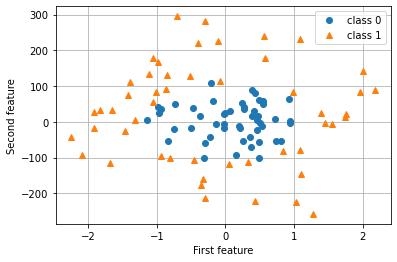

In [4]:
# generate data and plot
np.random.seed(47)
X,y = makeCircleClass(100)
scatter2Type(X[:,0],X[:,1],y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

### Part 1

Use pair (X,y) generated in the starter and run a linear SV classifier on the data.  
Use:  SVC(kernel="linear",C=1.0,max_iter=100000)

Run a standard monte-carlo cross_validation with 250 iterations, and test_size=0.25.  

Print the mean scores for the training and testing samples.  How well is it doing?

In [10]:
fullModel = Pipeline([
    ("scaler", StandardScaler()),
    ("lsv", SVC(kernel="linear",C=1.0,max_iter=100000))
])
cvf = ShuffleSplit(n_splits=100, test_size=0.25)
scores = cross_val_score(fullModel, X, y, cv=cvf)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


0.5738133333333333
0.55936


In [12]:
lsv = SVC(kernel="linear",C=1.0,max_iter=100000)
lsv.fit(X,y)
shuffle = ShuffleSplit(n_splits=250, test_size=0.25)
CVInfo = cross_validate(lsv, X, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated earl

0.57056
0.54416


C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Li Lin\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated earl

The train score is 0.57 and the test score is 0.544, which are not very high score and we need to try more refined processes, such as data scaling and trying non-linear model.

## Part 2: rescale data by hand

Build a new set of predictors, Xs, by simply subtracting the mean and dividing by the std for each predictor in X.
Rerun the previous monte-carlo cross-validation and report your results.

In [14]:
Xs = X.copy()
Xs=( Xs-np.mean(X))/np.std(X)

In [15]:
lsv = SVC(kernel="linear",C=1.0,max_iter=100000)
lsv.fit(Xs,y)
shuffle = ShuffleSplit(n_splits=250, test_size=0.25)
CVInfo = cross_validate(lsv, Xs, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.6112533333333333
0.5208


### Part 3: Now pipeline scaler

Repeat this with the StandardScaler().  Build a full model which combines the StandardScaler(), and the SVC() model using Pipeline().  Again, run a monte-carlo cross validation, and report the mean score in training and test samples.  Same specifications as last problems.

In [16]:
fullModel = Pipeline([
    ("scaler", StandardScaler()),
    ("lsv", SVC(kernel="linear",C=1.0,max_iter=100000))
])
cvf = ShuffleSplit(n_splits=250, test_size=0.25)
scores = cross_val_score(fullModel, Xs, y, cv=cvf)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


0.6112533333333333
0.5208


## Part 4: Nonlinear only (no scaling)

In this problem use the raw data (X,y) (no scaling), but changed the support vector to use a nonlinear, rbf kernel.  Use hyperparameters, C=1.0, and gamma=1.0.  Report the results for the same monte-carlo cross-validation as before.

In [23]:
rbf = SVC(C=1.0,kernel='rbf',gamma=1.0,max_iter=100000)
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(rbf, X, y, cv=shuffle,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

1.0
0.69744


## Part 5: Nonlinear with Pipeline scaler

Repeat the last section, but now bind the SVC model (nonlinear) with the StandardScaler() in a Pipeline().

In [24]:
fullModel = Pipeline([
    ("scaler", StandardScaler()),
    ("rbf", SVC(C=1.0,kernel='rbf',gamma=1.0,max_iter=100000))
])
cvf = ShuffleSplit(n_splits=250, test_size=0.25)
scores = cross_val_score(fullModel, X, y, cv=cvf)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


1.0
0.69744


### Part 6: Grid search

Finally, using the pipeline from the last part, perform a grid search on this model to find
the best hyperparameters.   Do this with the GridSearchCV() system.  Use 100 in your randomized monte-carlo cross validation, and a test_size of 0.25. 

Search in the following dual parameter grid,

C=[0.25, 0.5, 0.75, 1.0, 1.5, 2.0],
gamma = [0.0001,0.001,0.1,0.5,1.0,1.5,2.0]

Print a nice table (as we usually do) that includes the rank_test_score, mean_test_score, C, and gamma.  What is your best model?  Pull the best model from the grid search, and run it through a standard cross validation using 250 monte-carlo iterations, and report mean score in the test and training sets.

Also, report the score from the best model evaluated over the entire sample (X,y).



In [32]:
param_grid={'rbf__gamma':[0.0001,0.001,0.1,0.5,1.0,1.5,2.0]}
for Cparam in [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]:
    fullModel = Pipeline([("scaler", StandardScaler()),("rbf", SVC(C=Cparam,kernel='rbf'))])
    shuffle_split = ShuffleSplit(test_size=0.25, n_splits=100)
    grid_search=GridSearchCV(fullModel,param_grid,cv=shuffle_split,
                              return_train_score=True,n_jobs=-1)
    CVInfo = cross_validate(fullModel, X, y, cv=shuffle,return_train_score=True)
    grid_search.fit(Xs,y)
# move results into DataFrame
    results = pd.DataFrame(grid_search.cv_results_)
    print('At C is:',Cparam)
    print(results[['rank_test_score','mean_test_score','param_rbf__gamma','mean_train_score']])

At C is: 0.25
   rank_test_score  mean_test_score param_rbf__gamma  mean_train_score
0                6           0.4300           0.0001          0.523333
1                6           0.4300            0.001          0.523333
2                5           0.7396              0.1          0.791600
3                1           0.9016              0.5          0.928267
4                3           0.8936              1.0          0.938400
5                4           0.8924              1.5          0.940267
6                2           0.8952              2.0          0.943867
At C is: 0.5
   rank_test_score  mean_test_score param_rbf__gamma  mean_train_score
0                6           0.4228           0.0001          0.525733
1                6           0.4228            0.001          0.525733
2                5           0.8348              0.1          0.862533
3                1           0.9032              0.5          0.943200
4                2           0.8948              1

In [30]:
# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)
shuffle_split = ShuffleSplit(test_size=0.25, n_splits=250)
# This is best model
best_model = grid_search.best_estimator_

# Rerun cross validation for best model 
CVInfo = cross_validate(best_model, X, y, cv=shuffle,return_train_score=True)

print("(X, y) pair")
print("Mean Train Score:", np.mean(CVInfo['train_score']))
print("Mean Test Score:", np.mean(CVInfo['test_score']))

best param: {'rbf__gamma': 0.5}
best model: Pipeline(steps=[('scaler', StandardScaler()), ('rbf', SVC(C=2.0, gamma=0.5))])
best test score: 0.9052000000000001
(X, y) pair
Mean Train Score: 0.9574933333333333
Mean Test Score: 0.8963199999999999


## Part 7:  Compare and discuss

Compare and discuss your results.  How is this system doing with a linear SVC?  Does nonlinearity help?  Does rescaling help?

The train score for raw data with linear model:0.57
The test score for raw data with linear model: 0.544

The train score for scaled data with linear model is:0.6112533333333333
The test score for scaled data with linear model is:0.5208

The train score for full model which combines the StandardScaler() and linear SVC is: 0.6112533333333333
The train score for full model which combines the StandardScaler() and linear SVC is: 0.5208

The train score for raw data with non-linear SVC is: 1.0
The test score for raw data with non-linear SVC is:0.69744

The train score for scaled data with grid search and non-linear SVC model is:  0.9574933333333333
The train score for scaled data with grid search and non-linear SVC model is:  0.8963199999999999

Given the result above, we can conclude that linear SVC dose not perform well for our data and the scaled data did get a slightly higher train score than non-scaled data but the test score is smaller than linear SVC model with raw data.
The non-linear model with unscaled data has resulted a perfect score for the training sample but low score for test sample, which indicates that this model has the over-fitting problem even through the test score is slightly higher than the linear model.
The non-linear SVC model with scaled data and grid search yielded the highest train score and test score among all the model. With data scaling, the over-fitting problem was reduced and the test score is increased, which indicates that data scaling and grid search are helpful for over-fitting problem expecially for non-linear SVC model.